In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

Sex values as string: Male      5819
Female    1395
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    5819
1    1395
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    4666
M    2548
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    4666
0    2548
Name: c_charge_degree, dtype: int64
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
[66.81, 68.61, 68.26, 67.36, 65.14, 68.26, 65.9, 68.05, 70.55, 69.23, 67.15, 65.77, 66.74, 67.57, 68.4, 67.01, 67.22, 68.47, 64.86, 68.88, 67.5, 66.18, 69.23, 69.51, 67.98, 68.05, 66.53, 69.79, 69.09, 66.81, 66.18, 68.33, 69.02, 67.15, 65.0, 69.16, 69.23, 66.11, 67.08, 68.95, 67.01, 68.61, 66.04, 66.53, 68.95, 69.23, 69.72, 69.09, 68.54, 66.32, 67.98, 68.33, 69.02, 67.29, 66.32, 68.4, 66.87, 66.67, 68.54, 67.29, 67.71, 65.21, 69.51, 66.46, 68.88, 67.5, 67.98, 67.43, 67.01, 68.95, 68.68, 67.5, 67.36, 67.71, 67.78, 67.84, 65.77, 67.78, 66.39, 65.84, 66.74, 68.33, 68.4, 68.47, 68.26, 

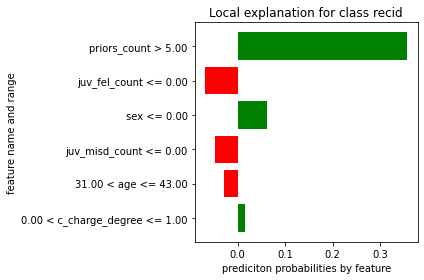

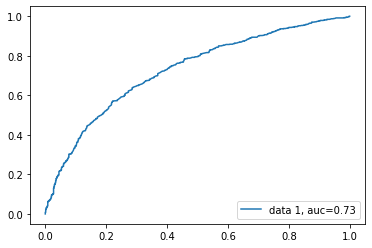

Mean validation accuracy/loss:  67.6683 stddev:  1.1310545123909814 Confidence Interval:  0.07010348497254615


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("compas-scores-two-years.csv")

predict = 'is_recid'
total = len(compas)
#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())


compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'violent_recid', 'in_custody','out_custody','start','end','event' ], axis=1)


x = np.array(compasfeat)
y = np.array(compas[predict])

epochs = 1000

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

linaccuracies= []
for _ in range(epochs):
  x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(x, y, test_size=.20)

  #build the model
  linear = linear_model.LogisticRegression(max_iter = 400)
  linear.fit(x_train2, y_train2)
  acc = linear.score(x_test2, y_test2)
  acc = round(acc*100, 2)
  linaccuracies.append(acc)


"""#open saved model
openoriginalLinear = pickle.load(open("originalLinear.sav", "rb"))"""
#results
DresselLinear = 'DresselLinear.sav'
pickle.dump(linear, open(DresselLinear, 'wb'))

print(linaccuracies)
linmeans = np.mean(linaccuracies, 0)
linstds = np.std(linaccuracies, 0)
linci95 = 1.96*linstds/np.sqrt(epochs)
linear_matrix = confusion_matrix(y_test2, linear.predict(x_test2))


i = 66


explainer = lime.lime_tabular.LimeTabularExplainer(x_train2, mode='classification',feature_names=compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')
print("Logisitic regression classifier accuracy: ",acc, "\nprediction: ", linear.predict(x_test2[i].reshape(1, -1)), "\nPredict probability: ", linear.predict_proba(x_test2[i].reshape(1, -1)), "\nConfusion Matrix:\n", linear_matrix)

print("prisoner information:\n", x_test2[i],y_test2[i])
print("Judges on the features: ", compasfeat.columns)
print("Linear: \n")
exp = explainer.explain_instance(x_test2[i], linear.predict_proba, num_features=len(compasfeat.columns))
#exp.show_in_notebook(show_table=True)
linearimg = exp.as_pyplot_figure()
plt.xlabel('prediciton probabilities by feature')
plt.ylabel('feature name and range')
plt.tight_layout()
linearimg.savefig('Dressellinearexp', format='pdf',bbox_inches='tight')
plt.show()

y_pred_proba = linear.predict_proba(x_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test2, y_pred_proba),2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('DresselLRAUC.pdf', format='pdf',bbox_inches='tight')
plt.show()

print("Mean validation accuracy/loss: ", linmeans, "stddev: ", linstds, "Confidence Interval: ",linci95)